In [20]:
import sklearn as skl
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
df = pd.read_table('../data/train.tsv', sep="\t", index_col=0)
df_test=pd.read_table('../data/test.tsv', sep="\t", index_col=0)
df

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
id,,,,,,,,,,,,,,
0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
172,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
173,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270


In [47]:
from sklearn.preprocessing import StandardScaler as SC
sc=SC()
sc.fit(df.drop('Y',axis=1))
dfs=pd.DataFrame(sc.transform(df.drop('Y',axis=1)),columns=df.drop('Y',axis=1).columns)
dfs.head() #モリくんの結果とは少々異なる #トレーニング用のデータ
dfs_test=pd.DataFrame(sc.transform(df_test),columns=df_test.columns)
dfs_test  #テスト用のデータを準び、トレーニングデータで作ったsc関数を適用

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.347625,-0.106092,-0.288847,-0.407695,0.315695,1.095308,1.273594,-1.061867,1.285169,0.281032,1.232022,0.817160,2.417299
1,0.284599,0.899895,-0.354763,-0.281706,-0.177232,-0.901927,-1.220143,1.956757,0.452780,2.303865,-1.785867,-1.582030,-0.222237
2,-1.120549,-1.015010,0.403274,1.104173,-1.585594,-0.554581,-0.469017,0.331344,-0.314324,-1.224430,1.494448,0.166777,-0.364488
3,-1.120549,-0.397298,-0.222930,-0.281706,-1.374340,-1.249272,-0.549138,1.260152,0.077389,-1.139615,0.488484,-0.483605,-0.838656
4,1.591998,-0.317878,1.095396,0.096261,1.371966,0.834799,1.093324,-0.210460,0.615993,0.471866,0.444747,0.065607,1.690241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.103251,-0.529665,-0.882093,-0.911651,0.034022,1.355817,1.343699,-1.139267,0.893456,0.429458,-0.255054,1.048407,0.757710
85,-0.436303,-0.812047,-1.211675,-0.710068,-0.036396,-0.519847,-0.639273,1.337552,-1.587389,0.281032,0.051109,-1.466406,-0.933490
86,0.492317,2.047073,1.556810,1.356151,0.808621,-0.589316,-1.089948,-0.674864,-0.787643,1.447236,-1.304754,-0.989459,-0.364488
87,-0.766207,-1.067956,-0.948010,-0.281706,-0.881413,2.085242,1.704239,-0.907066,0.583351,-0.249060,0.313534,0.239042,-0.269654


In [49]:
# 主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)
test_feature=pca.transform(dfs_test)
pd.DataFrame(feature[:,:3])

,0,1,2
0,-3.173219,0.842044,-0.065713
1,-1.148321,-0.282996,2.753837
2,2.017446,-0.079828,-0.467545
3,1.065284,-0.026498,-0.244806
4,1.140050,1.183989,3.049416
...,...,...,...
84,0.921019,-1.420664,-0.160016
85,-2.863620,1.527147,-0.689779
86,2.124282,1.167122,-0.032651
87,-2.162863,1.961086,0.114943


In [52]:
pd.DataFrame(test_feature[:,:3])

,0,1,2
0,3.373642,1.225789,-0.785763
1,-2.851474,2.190801,-1.088922
2,-0.455782,-2.150022,1.343412
3,-1.449698,-1.941849,0.238659
4,2.161893,2.228932,0.129371
...,...,...,...
84,2.670859,0.588486,-1.080731
85,-1.880035,-1.025042,-1.315574
86,-2.368346,2.396517,0.687569
87,2.193357,-1.196047,0.165827


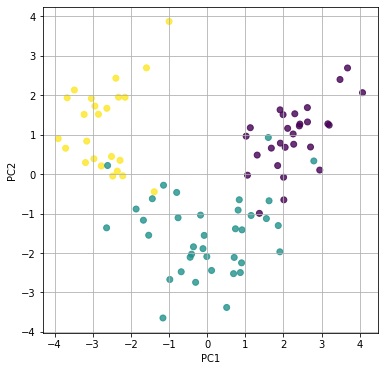

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]), )
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

data=feature[:,:3]
X_train,X_test,y_train,y_test=train_test_split(data,df['Y'],random_state=0)

In [26]:
tuned_parameters = [
    {'C': [1,5, 10,50, 100,500, 1000], 'kernel': ['linear'] },
    {'C': [1,5, 10,50, 100,500, 1000], 'kernel': ['rbf'], 'gamma': [0.01,0.001, 0.0001]},
    {'C': [1,5, 10,50, 100,500, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4,6,8], 'gamma': [0.01,0.001, 0.0001]},
    {'C': [1,5, 10,50, 100,500, 1000], 'kernel': ['sigmoid'], 'gamma': [0.01,0.001, 0.0001]}
    ]
#score = mean_absolute_error(y_pred, y_train)
clf = GridSearchCV(
    SVC(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=10, # 交差検定の回数
    n_jobs=-1,
   scoring='accuracy'
) # モデルの評価関数の指定
clf.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10, 50, 100, 500, 1000],
                          'kernel': ['linear']},
                         {'C': [1, 5, 10, 50, 100, 500, 1000],
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [1, 5, 10, 50, 100, 500, 1000],
                          'degree': [2, 3, 4, 6, 8],
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['poly']},
                         {'C': [1, 5, 10, 50, 100, 500, 1000],
                          'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')

In [27]:
def best_model(best_params):
    if best_params['kernel']=='rbf':
        model = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
    elif best_params['kernel']=='poly':
        model=SVC(kernel=best_params['kernel'], C=best_params['C'], degree=best_param['degree'],
                  gamma=best_params['gamma'])
    elif best_params['kernel']=='linear':
        model=SVC(kernel='linear',C=best_params['C'])
    elif best_params['kernel']=='sigmoid':
        model=SVC(kernel=best_params['kernel'],C=betst_params['C'],gamma=best_params['gammma'])
    return model

In [28]:
# 最適パラメータで学習させてモデルの保存
fit_model=best_model(clf.best_params_).fit(X_train,y_train)
acc= accuracy_score
#　上で学習させたモデルの評価
print(best_model(clf.best_params_)) #10.922771453707899
y_pred=fit_model.predict(X_test)
print(acc(y_pred,y_test))

SVC(C=1, kernel='linear')
0.9130434782608695


In [29]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [59]:
teisyutu_data=test_feature[:,:3]


In [62]:
pred=fit_model.predict(teisyutu_data)

In [63]:
df_test['Y']=pred

In [73]:
df_test['Y'].to_csv('teisyutu_svm.csv',header=False)

In [71]:
df_test

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Y
id,,,,,,,,,,,,,,
2,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1
4,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,3
5,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630,2
7,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,2
8,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985,1
170,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,2
171,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,3
